In [39]:
using Pkg, CairoMakie, LaTeXStrings
Pkg.activate("/Users/jiyong/.juliaenv/image")
using OpenCV, TestImages
cv = OpenCV;

  Activating project at `~/.juliaenv/image`


In [ ]:
function arr2mat(arr::Matrix{T}) where T
    cv.Mat(permutedims(stack([arr, ]), [3,2,1]))
end

function arr2mat(arr::Array{T, 3}) where T
    cv.Mat(arr)
end

function img2arr(img)
    T = typeof(img[1, 1].val.i)
    broadcast(q->T(q.val.i),img)
end

function img2mat(img) 
    T = typeof(img[1, 1].val.i)
    tm = broadcast(q->T(q.val.i),img)
    cv.Mat(permutedims(stack([tm, ]), [3,2,1]))
end

function mat2arr(mat::OpenCV.Mat)
    return permutedims(mat.data, [3,2,1])
end

function histogram1d(mat::OpenCV.Mat{T}) where T<:Union{UInt8, UInt16}
    tm = Int32(typemax(T))
    v = cv.calcHist(cv.InputArray[mat,], Int32[0], fill(UInt8(1), size(img1)), Int32[tm+1], Float32[0, tm+1])
    return (0:1:tm, Int64.(v[1,1,:]))    
end

# img0= testimage_dip3e("Fig0108(a) (corn-fluorescence).tif")
# img1 = img2arr(img0)
# img2 = (UInt8(255) .- img1)
# r = arr2mat(cat(img1, img2;dims=2))
# cv.imwrite("inversion.jpg", r)

histogram1d (generic function with 1 method)

In [118]:
img0= testimage_dip3e("Fig0227(a)(washington_infrared).tif")
img1 = cv.resize(img2mat(img0), cv.Size{Int32}(256, 256))
img2 = arr2mat(round.(UInt8, ((img1./255).^0.5)*255))
img3 = arr2mat(round.(UInt8, ((img1./255).^2)*255))
img4 = arr2mat(round.(UInt8, ((img1./255).^5)*255));

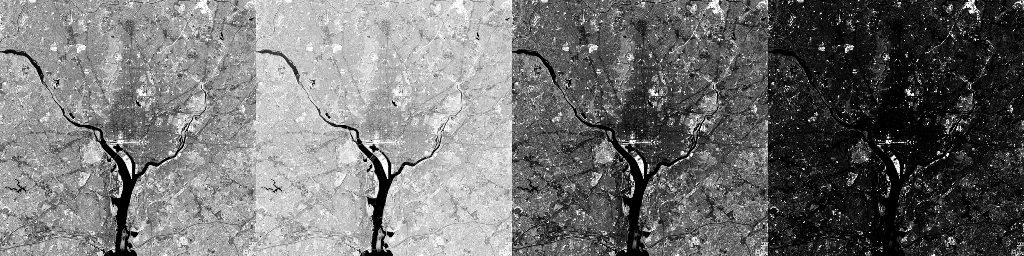

In [120]:
arr2mat(cat(img1, img2, img3, img4; dims=2))

In [121]:
cv.Point(Int32(0), Int32(100))

OpenCV.Point{Int32}(0, 100)

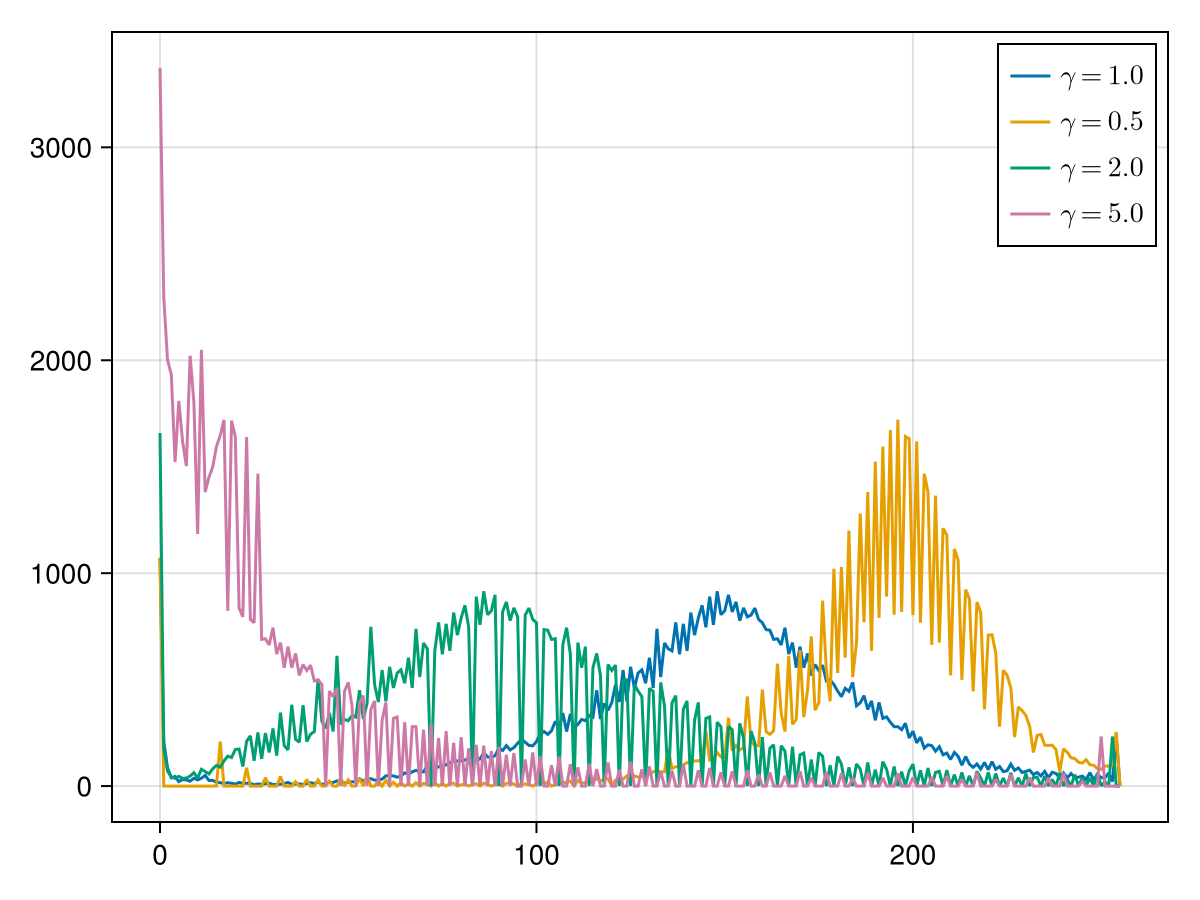

In [127]:
fig = Figure()
ax = Axis(fig[1,1])
for (img, g) in zip([img1, img2, img3, img4], [1.0, 0.5, 2, 5])
    b, v = histogram1d(img)
    lines!(ax, b, v, label = L"\gamma = %$g")
end
axislegend()
fig

In [ ]:
#save("histogram_gamma.png", fig)

CairoMakie.Screen{IMAGE}


In [131]:
methods(cv.equalizeHist)

# 2 methods for generic function "equalizeHist" from OpenCV:
 [1] equalizeHist(src::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}; dst)
     @ ~/.julia/artifacts/150dfaafce23ef83fd2922215ca12ea559ad4f8c/OpenCV/src/cv_cxx_wrap.jl:1818
 [2] equalizeHist(src::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, dst::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}})
     @ ~/.julia/artifacts/150dfaafce23ef83fd2922215ca12ea559ad4f8c/OpenCV/src/cv_cxx_wrap.jl:1815

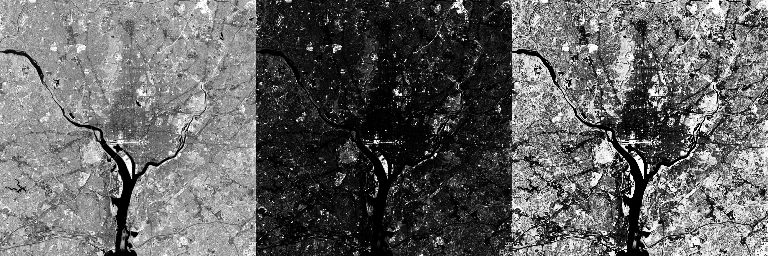

In [142]:
img5 = cv.equalizeHist(img4)
s = arr2mat(cat(img1, img4, img5; dims=2))
# cv.imwrite("equalize_histogram_1.png", s)

In [145]:
fig = Figure()
ax = Axis(fig[1,1])
for (img, g) in zip([img1, img4, img5], ["Original", "\\gamma=5", "Equalized"])
    b, v = histogram1d(img)
    lines!(ax, b, v, label = L"%$g")
end
axislegend()
fig
#save("equalize_histogram.png", fig)

CairoMakie.Screen{IMAGE}


In [ ]:
typeof(Array{OpenCV.InputArray, 1}())

In [ ]:
img1.data

In [ ]:
arr2mat(Array{UInt8}(undef, 0, 0))

In [13]:
help(ones)

┌ Warning: argument help isn't currently implemented correctly
└ @ Makie /Users/jiyong/.julia/packages/Makie/aX4rm/src/documentation/documentation.jl:63


```
ones([T=Float64,] dims::Tuple)
ones([T=Float64,] dims...)
```

Create an `Array`, with element type `T`, of all ones with size specified by `dims`. See also [`fill`](@ref), [`zeros`](@ref).

# Examples

```jldoctest
julia> ones(1,2)
1×2 Matrix{Float64}:
 1.0  1.0

julia> ones(ComplexF64, 2, 3)
2×3 Matrix{ComplexF64}:
 1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im
```

`ones` has the following function signatures: 

```
  (Vector, Vector)
  (Vector, Vector, Vector)
  (Matrix)
```

Available attributes for `Plot{ones}` are: 

```

```


In [14]:
methods(hist)

# 2 methods for generic function "hist" from Makie:
 [1] hist()
     @ ~/.julia/packages/MakieCore/sHgwT/src/recipes.jl:491
 [2] hist(args...; kw...)
     @ ~/.julia/packages/MakieCore/sHgwT/src/recipes.jl:508

In [15]:
fill(UInt8(1), 5,5)

5×5 Matrix{UInt8}:
 0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01

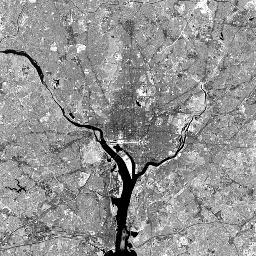

In [48]:
img1

In [ ]:
img0= cv.resize(img2mat(testimage("lena_gray_256.tif")), cv.Size{Int32}(100, 100))
img1 = cv.resize(img0, cv.Size(Int32(256), Int32(256));interpolation= cv.INTER_NEAREST)
img2 = cv.resize(img0, cv.Size(Int32(256), Int32(256));interpolation= cv.INTER_LINEAR)
img3 = cv.resize(img0, cv.Size(Int32(256), Int32(256));interpolation= cv.INTER_CUBIC)
s = arr2mat(cat(img1, img2, img3; dims=2))
#cv.imwrite("interpolation.png", s)

true

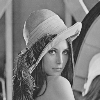

In [169]:
img0

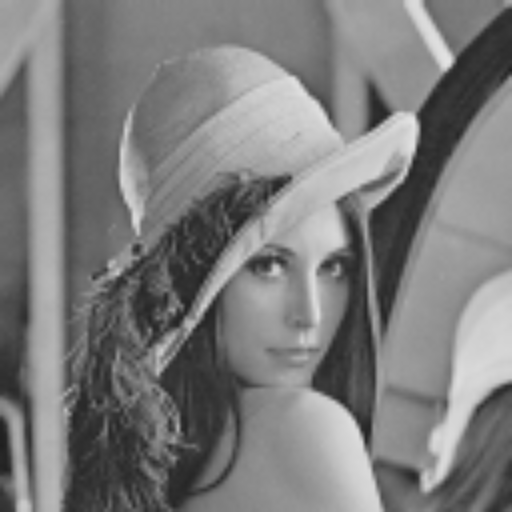

In [170]:
size(img0)

(1, 100, 100)